In [ ]:
import os
import xarray as xr
import pandas as pd
import re
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt



# Set your dataset path
dataset_path = r"C:\Users\Mayan\Downloads\sentinel 2024\sentinel 2024"

In [6]:
def count_chl_nn_rows(dataset_path):
    """Count rows in chl_nn.nc files for each day"""
    
    # Get all date folders
    date_folders = sorted([d for d in os.listdir(dataset_path) 
                          if os.path.isdir(os.path.join(dataset_path, d))])
    
    print("Date\t\tRows")
    print("-" * 20)
    
    for date_folder in date_folders:
        folder_path = os.path.join(dataset_path, date_folder)
        chl_file = os.path.join(folder_path, "chl_nn.nc")
        
        if os.path.exists(chl_file):
            try:
                ds = xr.open_dataset(chl_file)
                # Get the first dimension size (usually rows)
                rows = ds.sizes[list(ds.sizes.keys())[0]]
                print(f"{date_folder}\t{rows}")
                ds.close()
            except Exception as e:
                print(f"{date_folder}\tError: {e}")
        else:
            print(f"{date_folder}\tFile not found")


count_chl_nn_rows(dataset_path)

Date		Rows
--------------------
01-01-2024	4091
01-02-2024	4091
01-03-2024	4091
01-04-2024	4091
01-05-2024	4091
01-06-2024	4091
01-07-2024	4090
01-08-2024	4091
01-09-2024	4090
01-10-2024	4091
01-11-2024	4091
01-12-2024	4091
01-13-2024	4091
01-14-2024	4091
01-15-2024	4090
01-16-2024	4091
01-17-2024	4091
01-18-2024	4091
01-20-2024	4091
01-21-2024	4091
01-22-2024	4091
01-24-2024	4090
01-25-2024	4090
01-26-2024	4091
01-27-2024	4091
01-28-2024	4090
01-29-2024	4091
01-30-2024	4091
01-31-2024	4091
02-01-2024	4091
02-02-2024	4091
02-03-2024	4091
02-04-2024	4091
02-05-2024	4090
02-06-2024	4090
02-07-2024	4090
02-08-2024	4091
02-09-2024	4091
02-10-2024	4090
02-11-2024	4091
02-12-2024	4090
02-13-2024	4091
02-14-2024	4091
02-16-2024	4091
02-17-2024	4091
02-18-2024	4091
02-20-2024	4090
02-21-2024	4090
02-22-2024	4091
02-23-2024	4091
02-24-2024	4091
02-25-2024	4090
02-26-2024	4091
02-27-2024	4090
02-28-2024	4091
02-29-2024	4091
03-01-2024	4091
03-02-2024	4091
03-03-2024	4091
03-04-2024	4091
03-05-20

In [ ]:


print("Date\t\tTotal Pixels")
print("-" * 25)

for folder_name in date_folders:
    folder_path = os.path.join(dataset_path, folder_name)
    file_path_chl = os.path.join(folder_path, 'chl_nn.nc')
    
    if os.path.exists(file_path_chl):
        try:
            ds_chl = xr.open_dataset(file_path_chl)
            chl = ds_chl['CHL_NN'].values
            total_pixels = chl.size
            
            print(f"{folder_name}\t{total_pixels}")
            
            ds_chl.close()
            
        except Exception as e:
            print(f"{folder_name}\tError: {e}")
    else:
        print(f"{folder_name}\tFile not found")

Date		Total Pixels
-------------------------
01-01-2024	19902715
01-02-2024	19902715
01-03-2024	19902715
01-04-2024	19902715
01-05-2024	19902715
01-06-2024	19902715
01-07-2024	19897850
01-08-2024	19902715
01-09-2024	19897850
01-10-2024	19902715
01-11-2024	19902715
01-12-2024	19902715
01-13-2024	19902715
01-14-2024	19902715
01-15-2024	19897850
01-16-2024	19902715
01-17-2024	19902715
01-18-2024	19902715
01-20-2024	19902715
01-21-2024	19902715
01-22-2024	19902715
01-24-2024	19897850
01-25-2024	19897850
01-26-2024	19902715
01-27-2024	19902715
01-28-2024	19897850
01-29-2024	19902715
01-30-2024	19902715
01-31-2024	19902715
02-01-2024	19902715
02-02-2024	19902715
02-03-2024	19902715
02-04-2024	19902715
02-05-2024	19897850
02-06-2024	19897850
02-07-2024	19897850
02-08-2024	19902715
02-09-2024	19902715
02-10-2024	19897850
02-11-2024	19902715
02-12-2024	19897850
02-13-2024	19902715
02-14-2024	19902715
02-16-2024	19902715
02-17-2024	19902715
02-18-2024	19902715
02-20-2024	19897850
02-21-2024	1989

In [ ]:

# Define the bitmask for bad-quality flags in the WQSF layer
# These represent invalid or contaminated data pixels
bad_flag_bits = (
    1         |  # INVALID
    8         |  # CLOUD
    8388608   |  # CLOUD_AMBIGUOUS
    16777216  |  # CLOUD_MARGIN
    16        |  # SNOW_ICE
    128       |  # COSMETIC
    1024      |  # SATURATED
    256       |  # SUSPECT
    512       |  # HISOLZEN
    4096         # HIGHGLINT
)

# Get all folder names (i.e., all dates) inside the dataset path
date_folders = sorted([
    d for d in os.listdir(dataset_path) 
    if os.path.isdir(os.path.join(dataset_path, d))
])

# Print header
print("Date\t\tMasked Pixel Count")
print("-" * 35)

c=0
# Loop through each date folder
for folder_name in date_folders:
    c+=1
    if c==11:
        break
    folder_path = os.path.join(dataset_path, folder_name)
    
    # Define the paths for the CHL_NN and WQSF files
    file_path_chl = os.path.join(folder_path, 'chl_nn.nc')
    file_path_wqsf = os.path.join(folder_path, 'wqsf.nc')
    
    # Skip if either file is missing
    if not os.path.exists(file_path_chl) or not os.path.exists(file_path_wqsf):
        print(f"{folder_name}\tMissing files")
        continue
    
    try:
        # Open NetCDF datasets
        ds_chl = xr.open_dataset(file_path_chl)
        ds_wqsf = xr.open_dataset(file_path_wqsf)
        
        # Extract CHL_NN and WQSF data as numpy arrays
        chl = ds_chl['CHL_NN'].values
        wqsf = ds_wqsf['WQSF'].values.astype(int)
        
        # Create a boolean mask for good pixels (where all bad flags are NOT set)
        good_mask = (wqsf & bad_flag_bits) == 0
        
        # Apply the good mask: keep valid pixels, set the rest to NaN
        chl_masked = np.where(good_mask, chl, np.nan)
        
        # Further clean the data: remove non-physical values (e.g., 0 or > 50)
        chl_masked[(chl_masked <= 0) | (chl_masked >= 50)] = np.nan
        
        # Save the final masked chlorophyll data to a CSV file (2D grid)
        output_csv = os.path.join(folder_path, "chl_masked.csv")
        pd.DataFrame(chl_masked).to_csv(
            output_csv, index=False, header=False, float_format="%.3f"
        )
        
        # Count and print the number of valid (finite) pixels for the day
        valid_pixel_count = np.isfinite(chl_masked).sum()
        print(f"{folder_name}\t{valid_pixel_count}")
        
        # Close the datasets to free memory
        ds_chl.close()
        ds_wqsf.close()
        
    except Exception as e:
        # Handle any unexpected errors gracefully
        print(f"{folder_name}\tError: {e}")


Date		Masked Pixel Count
-----------------------------------
01-01-2024	94636
01-02-2024	18739
01-03-2024	4807
01-04-2024	1722412
01-05-2024	4998
01-06-2024	851638
01-07-2024	6652
01-08-2024	2218920
01-09-2024	8629
01-10-2024	296672


In [ ]:
# Bad quality flag bits
bad_flag_bits = (
    1         |  # INVALID
    2         |  # LAND
    8         |  # CLOUD
    8388608   |  # CLOUD_AMBIGUOUS
    16777216  |  # CLOUD_MARGIN
    16        |  # SNOW_ICE
    128       |  # COSMETIC
    1024      |  # SATURATED
    256       |  # SUSPECT
    512       |  # HISOLZEN
    4096      |  # HIGHGLINT
    524288       # OCNN_FAIL
)

# AOI bounding box
lat_min, lat_max = 28.3765, 28.8939
lon_min, lon_max = 77.1542, 77.5223

results = []

# List all folders
folders = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

for folder_name in folders:
    folder_path = os.path.join(dataset_path, folder_name)
    file_path_chl = os.path.join(folder_path, 'chl_nn.nc')
    file_path_wqsf = os.path.join(folder_path, 'wqsf.nc')
    file_path_geo = os.path.join(folder_path, 'geo_coordinates.nc')

    if not (os.path.exists(file_path_chl) and os.path.exists(file_path_wqsf) and os.path.exists(file_path_geo)):
        print(f"{folder_name}: Missing required files.")
        continue

    try:
        # Load datasets
        ds_chl = xr.open_dataset(file_path_chl)
        ds_wqsf = xr.open_dataset(file_path_wqsf)
        ds_geo = xr.open_dataset(file_path_geo)

        chl = ds_chl['CHL_NN'].values
        wqsf = ds_wqsf['WQSF'].values.astype(int)
        lat = ds_geo['latitude'].values
        lon = ds_geo['longitude'].values

        # Mask geolocation (lat/lon) to Area of Interest
        geo_mask = (
            (lat >= lat_min) & (lat <= lat_max) &
            (lon >= lon_min) & (lon <= lon_max) &
            np.isfinite(lat) & np.isfinite(lon) & np.isfinite(chl)
        )

        # Mask quality flags
        quality_mask = (wqsf & bad_flag_bits) == 0

        # Combined mask
        final_mask = geo_mask & quality_mask
        chl_masked = np.where(final_mask, chl, np.nan)

        # Convert from log10 to actual concentration
        chl_actual = 10 ** chl_masked
        chl_actual[~np.isfinite(chl_actual)] = np.nan

        # IQR outlier removal
        valid = chl_actual[np.isfinite(chl_actual)]
        if len(valid) == 0:
            continue

        Q1 = np.percentile(valid, 25)
        Q3 = np.percentile(valid, 75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered = valid[(valid >= lower_bound) & (valid <= upper_bound)]

        if len(filtered) == 0:
            continue

        mean_chl = np.mean(filtered)

        # Format date from folder name
        try:
            date_str = pd.to_datetime(folder_name.split('_')[-1], format="%Y%m%d").strftime("%d-%m-%Y")
        except:
            date_str = folder_name  # fallback

        results.append((date_str, mean_chl))

        ds_chl.close()
        ds_wqsf.close()
        ds_geo.close()

    except Exception as e:
        print(f"{folder_name}: Error - {e}")

# Save results
df = pd.DataFrame(results, columns=["Date", "chl-a_concentration"])
df.sort_values("Date", inplace=True)
output_path = os.path.join(dataset_path, "daywise_chlorophyll.csv")
df.to_csv(output_path, index=False)

print("\nSaved:", output_path)



Saved: C:\Users\Mayan\Downloads\sentinel 2024\sentinel 2024\daywise_chlorophyll.csv


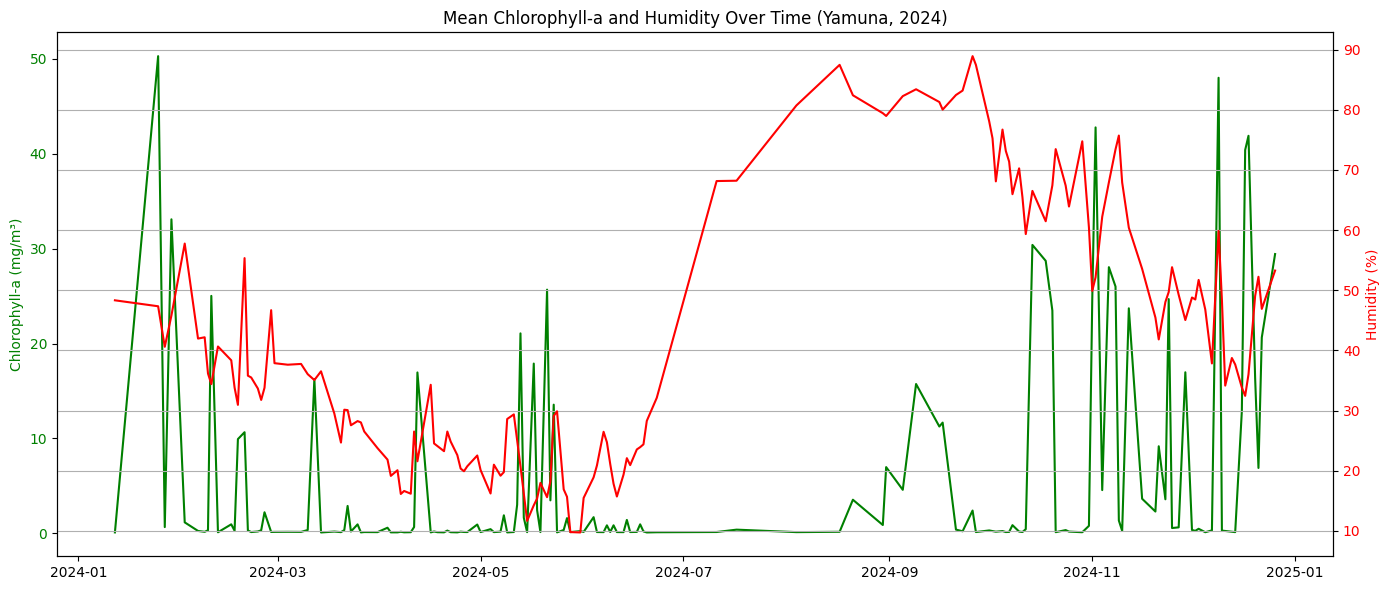

In [8]:

# Step 1: Load CSVs
df_chl = pd.read_csv("daywise_chlorophyll.csv")
df_humid = pd.read_csv("mean_humidity_yamuna_2024.csv")

# Step 2: Convert 'date' column to datetime
df_chl['date'] = pd.to_datetime(df_chl['Date'])
df_humid['date'] = pd.to_datetime(df_humid['Date'])

# Step 3: Merge both datasets on 'date'
df_merged = pd.merge(df_chl, df_humid, on='date', how='inner')

# Step 4: Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot chlorophyll-a on left Y-axis
ax1.plot(df_merged['date'], df_merged['chl-a_concentration'], color='green', label='Chlorophyll-a')
ax1.set_ylabel('Chlorophyll-a (mg/m³)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Create second Y-axis for humidity
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['Mean_Relative_Humidity_%'], color='red', label='Humidity')
ax2.set_ylabel('Humidity (%)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Final plot settings
plt.title("Mean Chlorophyll-a and Humidity Over Time (Yamuna, 2024)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


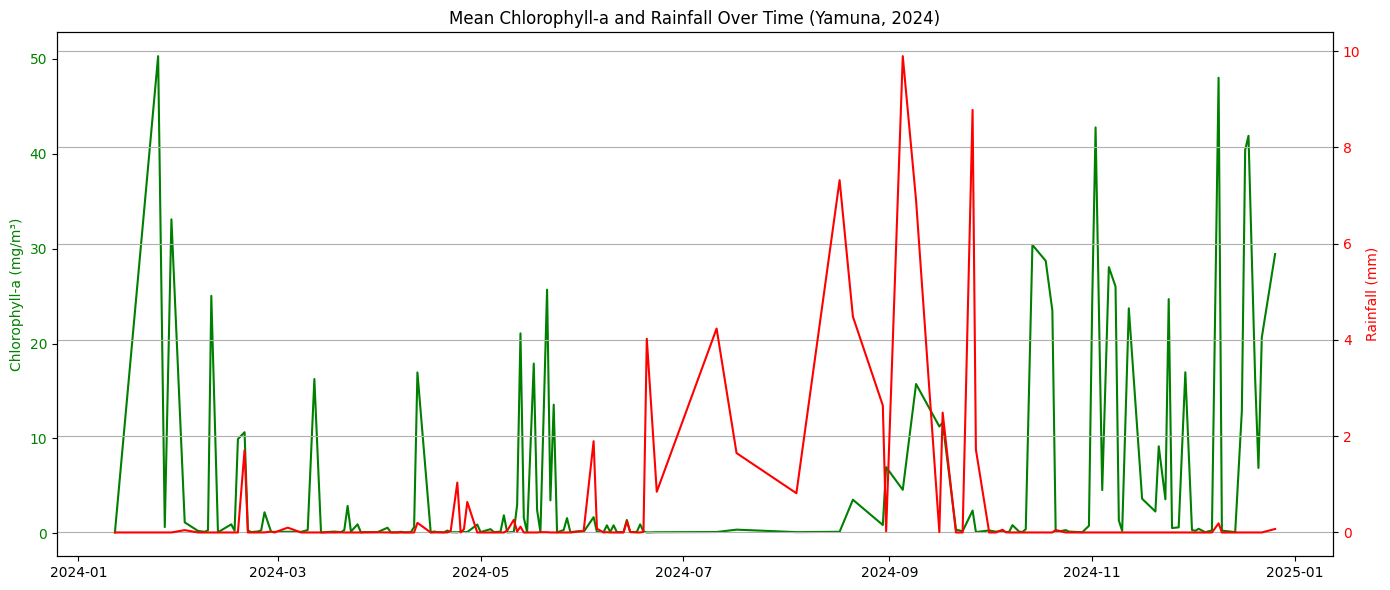

In [9]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load both CSVs
df_chl = pd.read_csv("daywise_chlorophyll.csv")
df_rain = pd.read_csv("mean_rainfall_yamuna_2024.csv")

# Step 2: Parse date columns (assuming format is DD-MM-YYYY in rainfall file)
df_chl['date'] = pd.to_datetime(df_chl['Date'])
df_rain['Date'] = pd.to_datetime(df_rain['Date'])

# Step 3: Rename for consistency (optional)
df_rain.rename(columns={'Date': 'date'}, inplace=True)

# Step 4: Merge both datasets on 'date'
df_merged = pd.merge(df_chl, df_rain, on='date', how='inner')

# Step 5: Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Plot chlorophyll-a (left Y-axis)
ax1.plot(df_merged['date'], df_merged['chl-a_concentration'], color='green', label='Chlorophyll-a')
ax1.set_ylabel('Chlorophyll-a (mg/m³)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Plot rainfall (right Y-axis)
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['Mean_Rainfall_mm'], color='red', linestyle='-', label='Rainfall')
ax2.set_ylabel('Rainfall (mm)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Final styling
plt.title("Mean Chlorophyll-a and Rainfall Over Time (Yamuna, 2024)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


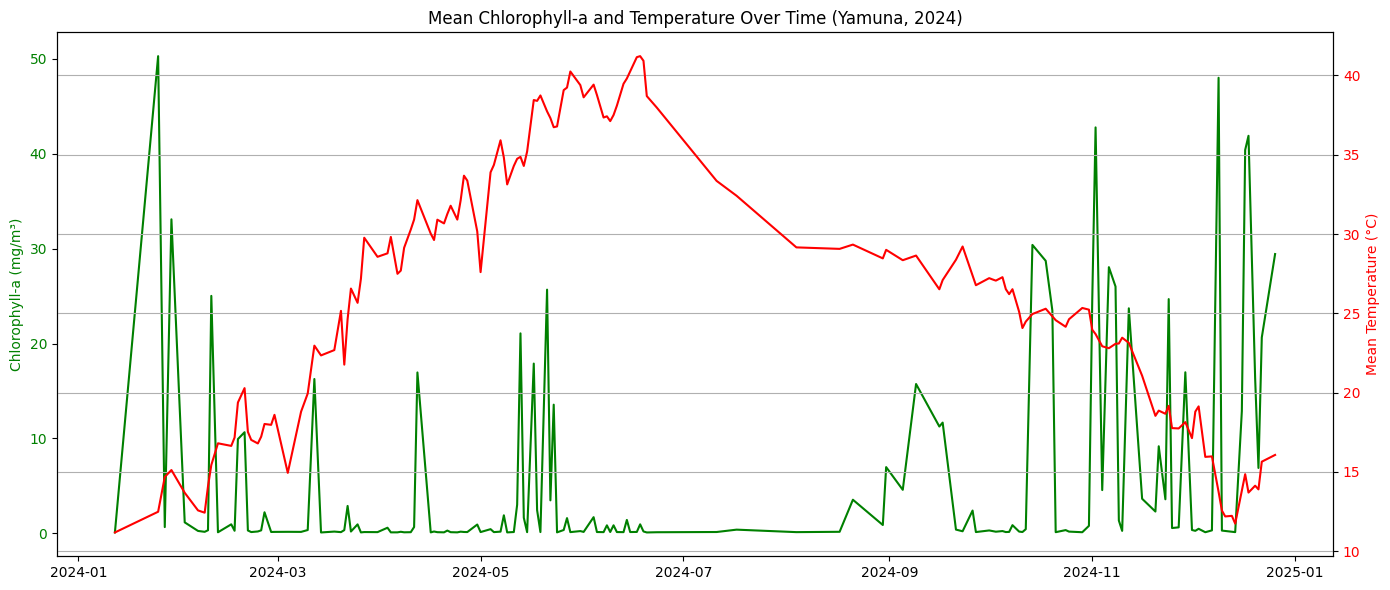

In [10]:
import pandas as pd
import matplotlib.pyplot as plt

# Step 1: Load CSVs
df_chl = pd.read_csv("daywise_chlorophyll.csv")
df_temp = pd.read_csv("mean_temperature_yamuna_2024.csv")

# Step 2: Parse date columns (assuming format is DD-MM-YYYY)
df_chl['date'] = pd.to_datetime(df_chl['Date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])

# Step 3: Rename for consistency
df_temp.rename(columns={'Date': 'date'}, inplace=True)

# Step 4: Merge on 'date'
df_merged = pd.merge(df_chl, df_temp, on='date', how='inner')

# Step 5: Plotting
fig, ax1 = plt.subplots(figsize=(14, 6))

# Chlorophyll-a (left Y-axis)
ax1.plot(df_merged['date'], df_merged['chl-a_concentration'], color='green', label='Chlorophyll-a')
ax1.set_ylabel('Chlorophyll-a (mg/m³)', color='green')
ax1.tick_params(axis='y', labelcolor='green')

# Temperature (right Y-axis)
ax2 = ax1.twinx()
ax2.plot(df_merged['date'], df_merged['Mean_Temperature_C'], color='red', linestyle='-', label='Temperature')
ax2.set_ylabel('Mean Temperature (°C)', color='red')
ax2.tick_params(axis='y', labelcolor='red')

# Final styling
plt.title("Mean Chlorophyll-a and Temperature Over Time (Yamuna, 2024)")
plt.xlabel("Date")
plt.grid(True)
plt.tight_layout()
plt.show()


🔍 Correlation with Chlorophyll-a Concentration:
chl-a_concentration         1.000000
Mean_Temperature_C         -0.274595
Mean_Rainfall_mm           -0.031116
Mean_Relative_Humidity_%    0.158900
Name: chl-a_concentration, dtype: float64


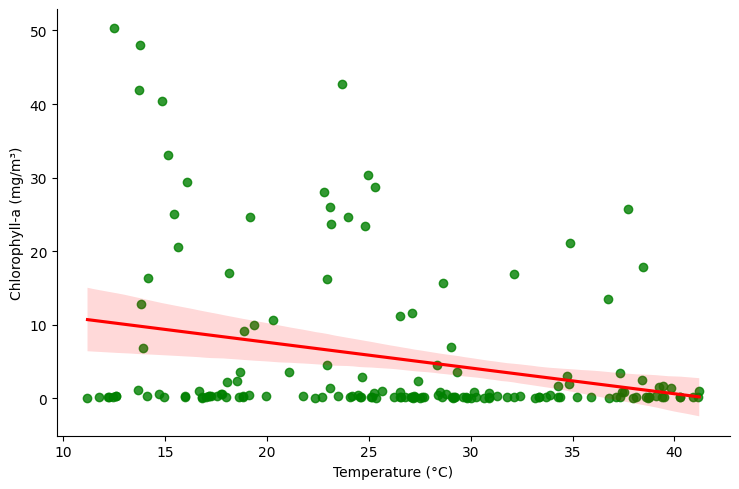

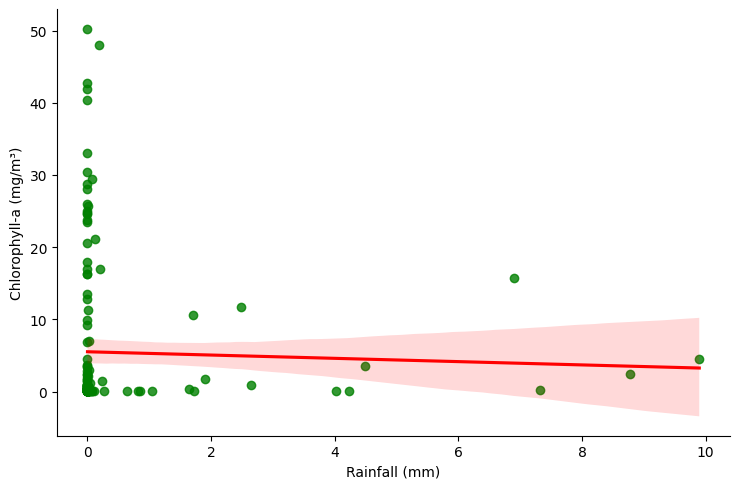

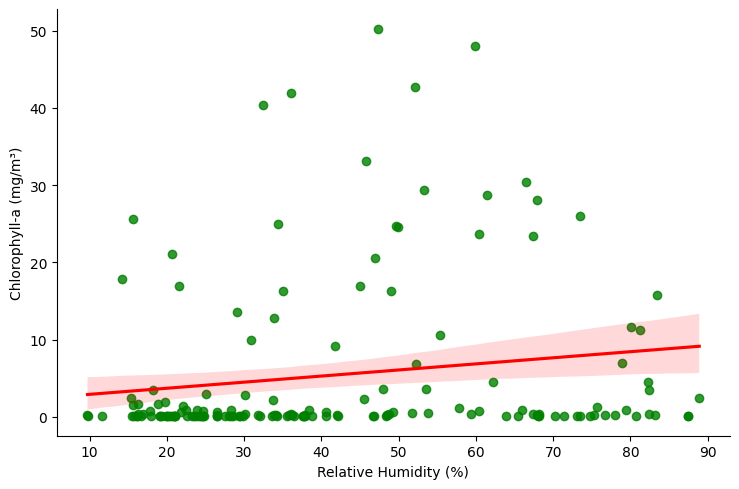

In [11]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import statsmodels.api as sm

# Step 1: Load data
df_chl = pd.read_csv("daywise_chlorophyll.csv")
df_temp = pd.read_csv("mean_temperature_yamuna_2024.csv")
df_rain = pd.read_csv("mean_rainfall_yamuna_2024.csv")
df_humid = pd.read_csv("mean_humidity_yamuna_2024.csv")

# Step 2: Convert Date columns to datetime
df_chl['Date'] = pd.to_datetime(df_chl['Date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_rain['Date'] = pd.to_datetime(df_rain['Date'])
df_humid['Date'] = pd.to_datetime(df_humid['Date'])

# Step 3: Merge all data on Date
df = df_chl.merge(df_temp, on='Date') \
           .merge(df_rain, on='Date') \
           .merge(df_humid, on='Date')

# Step 4: Correlation with chlorophyll
print("🔍 Correlation with Chlorophyll-a Concentration:")
print(df.corr(numeric_only=True)['chl-a_concentration'])

# Step 5: Scatter plots with regression lines
sns.lmplot(data=df, x="Mean_Temperature_C", y="chl-a_concentration", aspect=1.5,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.xlabel("Temperature (°C)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

sns.lmplot(data=df, x="Mean_Rainfall_mm", y="chl-a_concentration", aspect=1.5,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.xlabel("Rainfall (mm)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

sns.lmplot(data=df, x="Mean_Relative_Humidity_%", y="chl-a_concentration", aspect=1.5,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

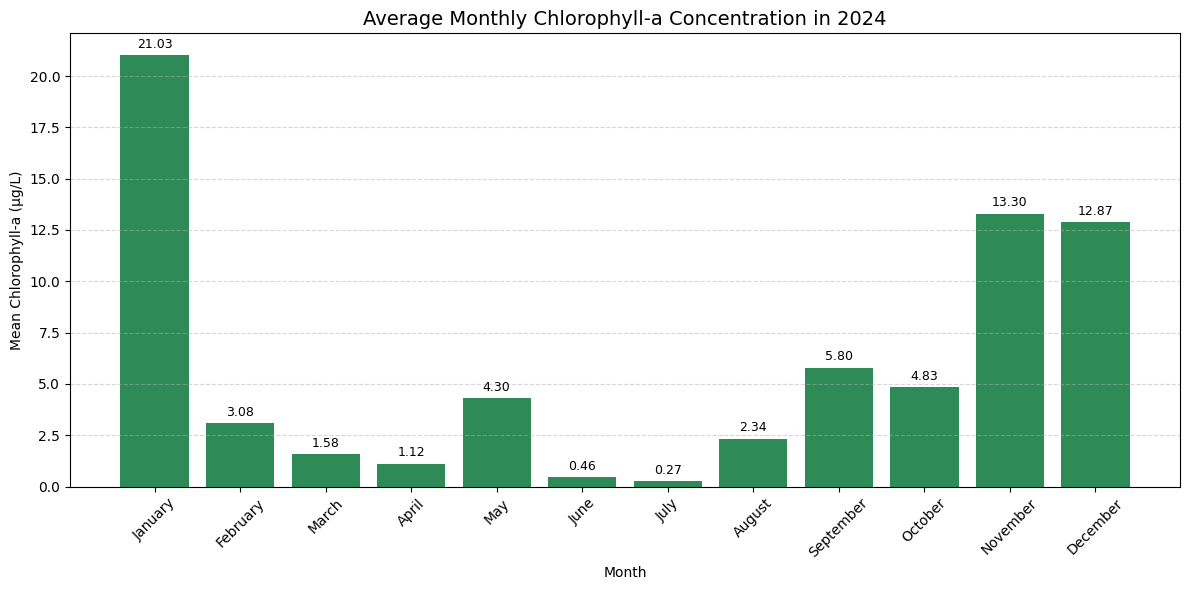

In [ ]:
# Load chlorophyll-a data
df_chl = pd.read_csv("daywise_chlorophyll.csv")

# Convert 'Date' to datetime (your format is DD-MM-YYYY)
df_chl['Date'] = pd.to_datetime(df_chl['Date'])

# Extract month names and month numbers for ordering
df_chl['Month'] = df_chl['Date'].dt.strftime('%B')
df_chl['Month_Num'] = df_chl['Date'].dt.month

# Group by Month and calculate mean
monthly_mean = df_chl.groupby(['Month_Num', 'Month'])['chl-a_concentration'].mean().reset_index()

# Sort by month number
monthly_mean = monthly_mean.sort_values('Month_Num')

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_mean['Month'], monthly_mean['chl-a_concentration'], color='seagreen')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9)

# Labels and styling
plt.title("Average Monthly Chlorophyll-a Concentration in 2024", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Mean Chlorophyll-a (µg/L)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()

In [ ]:
# Bad quality flag bits
bad_flag_bits = (
    1         |  # INVALID
    2         |  # LAND
    8         |  # CLOUD
    8388608   |  # CLOUD_AMBIGUOUS
    16777216  |  # CLOUD_MARGIN
    16        |  # SNOW_ICE
    128       |  # COSMETIC
    1024      |  # SATURATED
    256       |  # SUSPECT
    512       |  # HISOLZEN
    4096      |  # HIGHGLINT
    524288       # OCNN_FAIL
)

# Collect results
results = []

# AOI bounding box
lat_min, lat_max = 28.3765, 28.8939
lon_min, lon_max = 77.1542, 77.5223

# List all folders
folders = sorted([f for f in os.listdir(dataset_path) if os.path.isdir(os.path.join(dataset_path, f))])

for folder_name in folders:
    folder_path = os.path.join(dataset_path, folder_name)
    file_path_chl = os.path.join(folder_path, 'chl_nn.nc')
    file_path_wqsf = os.path.join(folder_path, 'wqsf.nc')
    file_path_geo = os.path.join(folder_path, 'geo_coordinates.nc')

    if not os.path.exists(file_path_chl) or not os.path.exists(file_path_wqsf) or not os.path.exists(file_path_geo):
        print(f"{folder_name}: Missing required files.")
        continue

    try:
        # Load datasets
        ds_chl = xr.open_dataset(file_path_chl)
        ds_wqsf = xr.open_dataset(file_path_wqsf)
        ds_geo = xr.open_dataset(file_path_geo)

        chl = ds_chl['CHL_NN'].values
        wqsf = ds_wqsf['WQSF'].values.astype(int)
        lat = ds_geo['latitude'].values
        lon = ds_geo['longitude'].values

        # AOI + NaN mask
        aoi_mask = (
            (lat >= lat_min) & (lat <= lat_max) &
            (lon >= lon_min) & (lon <= lon_max) &
            np.isfinite(chl) & np.isfinite(lat) & np.isfinite(lon)
        )

        # Apply WQSF flags for quality masking
        good_quality_mask = (wqsf & bad_flag_bits) == 0

        # Final mask: AOI + good quality
        final_mask = aoi_mask & good_quality_mask

        chl_masked = chl[final_mask]

        # Convert from log10 to actual chl-a concentration
        chl_actual = 10 ** chl_masked
        chl_actual[~np.isfinite(chl_actual)] = np.nan

        # Compute mean chlorophyll
        valid = chl_actual[np.isfinite(chl_actual)]
        if len(valid) == 0:
            continue

        mean_chl = np.mean(valid)

        # Format date from folder name
        try:
            date_str = pd.to_datetime(folder_name.split('_')[-1], format="%Y%m%d").strftime("%d-%m-%Y")
        except:
            date_str = folder_name  # fallback if date not parseable

        results.append((date_str, mean_chl))

        # Close datasets
        ds_chl.close()
        ds_wqsf.close()
        ds_geo.close()

    except Exception as e:
        print(f"{folder_name}: Error - {e}")

# Save to CSV
df = pd.DataFrame(results, columns=["Date", "chl-a_concentration"])
df.sort_values("Date", inplace=True)
output_path = os.path.join(dataset_path, "full_daywise_chlorophyll.csv")
df.to_csv(output_path, index=False)

print("\nSaved:", output_path)



Saved: C:\Users\Mayan\Downloads\sentinel 2024\sentinel 2024\full_daywise_chlorophyll.csv


🔍 Correlation with Chlorophyll-a Concentration:
chl-a_concentration         1.000000
Mean_Temperature_C         -0.331133
Mean_Rainfall_mm           -0.055840
Mean_Relative_Humidity_%    0.173273
Name: chl-a_concentration, dtype: float64


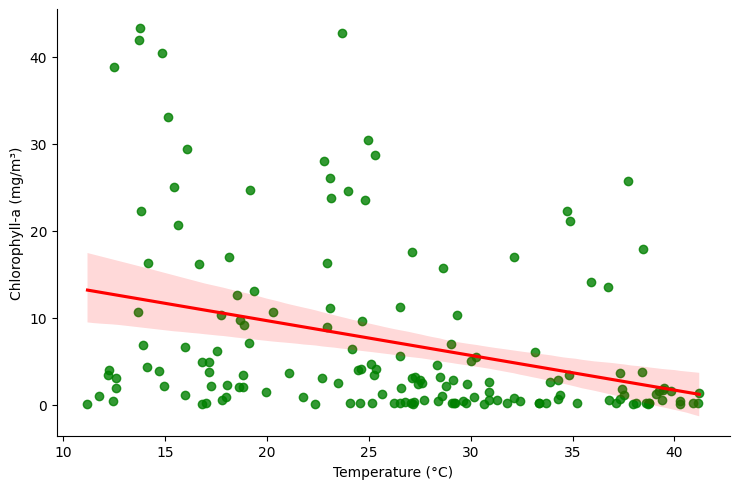

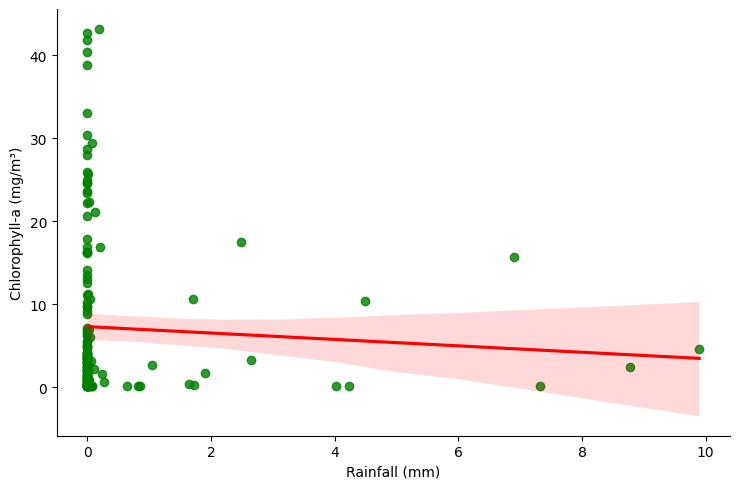

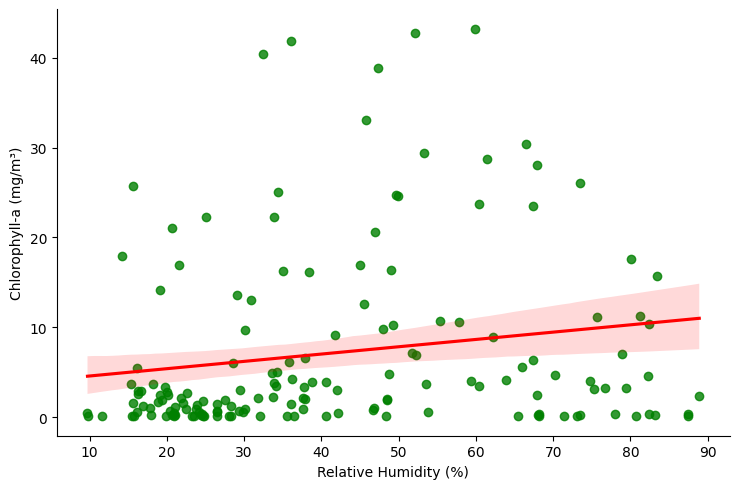

In [ ]:
# Step 1: Load data
df_chl = pd.read_csv("full_daywise_chlorophyll.csv")
df_temp = pd.read_csv("mean_temperature_yamuna_2024.csv")
df_rain = pd.read_csv("mean_rainfall_yamuna_2024.csv")
df_humid = pd.read_csv("mean_humidity_yamuna_2024.csv")

# Step 2: Convert Date columns to datetime
df_chl['Date'] = pd.to_datetime(df_chl['Date'])
df_temp['Date'] = pd.to_datetime(df_temp['Date'])
df_rain['Date'] = pd.to_datetime(df_rain['Date'])
df_humid['Date'] = pd.to_datetime(df_humid['Date'])

# Step 3: Merge all data on Date
df = df_chl.merge(df_temp, on='Date') \
           .merge(df_rain, on='Date') \
           .merge(df_humid, on='Date')

# Step 4: Correlation with chlorophyll
print("🔍 Correlation with Chlorophyll-a Concentration:")
print(df.corr(numeric_only=True)['chl-a_concentration'])

# Step 5: Scatter plots with regression lines
sns.lmplot(data=df, x="Mean_Temperature_C", y="chl-a_concentration", aspect=1.5,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.xlabel("Temperature (°C)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

sns.lmplot(data=df, x="Mean_Rainfall_mm", y="chl-a_concentration", aspect=1.5,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})

plt.xlabel("Rainfall (mm)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

sns.lmplot(data=df, x="Mean_Relative_Humidity_%", y="chl-a_concentration", aspect=1.5,scatter_kws={'color': 'green'}, line_kws={'color': 'red'})
plt.xlabel("Relative Humidity (%)")
plt.ylabel("Chlorophyll-a (mg/m³)")
plt.show()

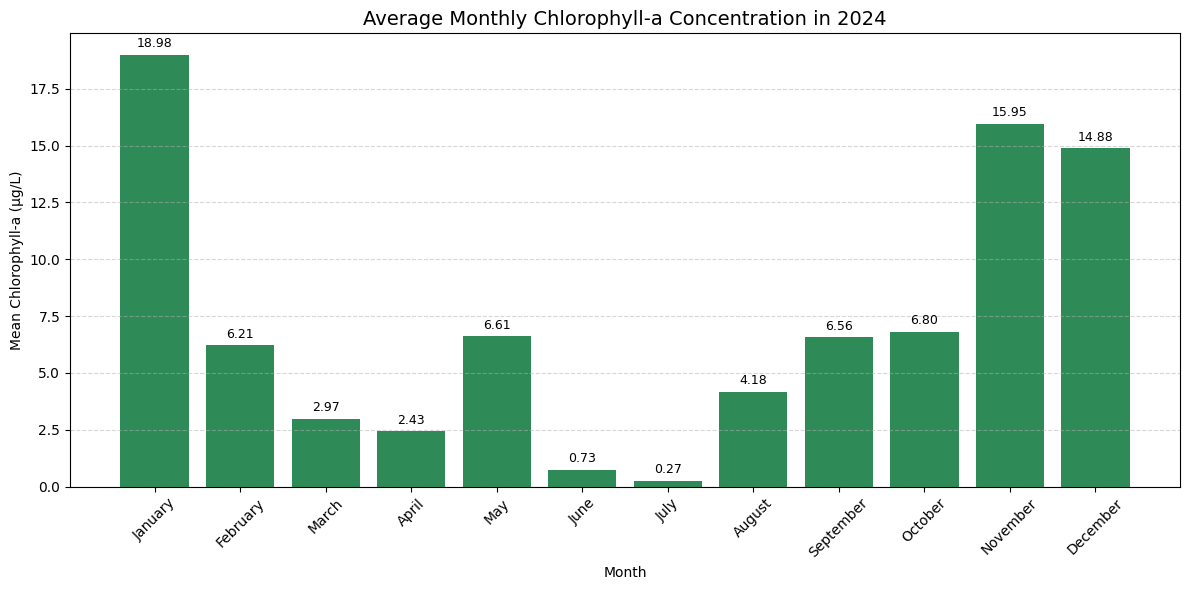

In [ ]:
# Load chlorophyll-a data
df_chl = pd.read_csv("full_daywise_chlorophyll.csv")

# Convert 'Date' to datetime (your format is DD-MM-YYYY)
df_chl['Date'] = pd.to_datetime(df_chl['Date'])

# Extract month names and month numbers for ordering
df_chl['Month'] = df_chl['Date'].dt.strftime('%B')
df_chl['Month_Num'] = df_chl['Date'].dt.month

# Group by Month and calculate mean
monthly_mean = df_chl.groupby(['Month_Num', 'Month'])['chl-a_concentration'].mean().reset_index()

# Sort by month number
monthly_mean = monthly_mean.sort_values('Month_Num')

# Plotting
plt.figure(figsize=(12, 6))
bars = plt.bar(monthly_mean['Month'], monthly_mean['chl-a_concentration'], color='seagreen')

# Add value labels on top of bars
for bar in bars:
    height = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, height + 0.2, f'{height:.2f}', 
             ha='center', va='bottom', fontsize=9)

# Labels and styling
plt.title("Average Monthly Chlorophyll-a Concentration in 2024", fontsize=14)
plt.xlabel("Month")
plt.ylabel("Mean Chlorophyll-a (µg/L)")
plt.xticks(rotation=45)
plt.grid(axis='y', linestyle='--', alpha=0.5)
plt.tight_layout()
plt.show()